# # # Keras API Project Exercise

The Data
We will be using a subset of the LendingClub DataSet obtained from Kaggle: https://www.kaggle.com/wordsforthewise/lending-club


LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California.[3] It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.

Goal

Given historical data on loans given out with information on whether or not the borrower defaulted (charge-off), can we build a model thatcan predict wether or nor a borrower will pay back their loan? This way in the future when we get a new potential customer we can assess whether or not they are likely to pay back the loan. Keep in mind classification metrics when evaluating the performance of your model!

The "loan_status" column contains our label.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
pd.pandas.set_option('display.max_columns',None)

# Code to describe any data feature when called upon

In [2]:
data_info = pd.read_csv('../DATA/lending_club_info.csv',index_col='LoanStatNew')

print(data_info.loc['revol_util']['Description'])

def feat_info(col_name):
    ## This function will provide the descripion of the column name that is called
    
    print(data_info.loc[col_name]['Description'])
    

feat_info('mort_acc')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.
Number of mortgage accounts.


# Raw Data

In [3]:
df = pd.read_csv('../DATA/lending_club_loan_two.csv')

In [4]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


# Checking for missing values


In [5]:
feature_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]
print('There are {} features with missing values'.format(len(feature_nan)))

There are 6 features with missing values


In [6]:
# Check percentage of missing data from each feature
for feature in feature_nan:
    print('{} feature has {} % of missing data'.format(feature,df[feature].isnull().mean()*100))

emp_title feature has 5.7892078882912905 % of missing data
emp_length feature has 4.621114562028129 % of missing data
title feature has 0.44314824634497385 % of missing data
revol_util feature has 0.06969169002348306 % of missing data
mort_acc feature has 9.543468929121532 % of missing data
pub_rec_bankruptcies feature has 0.13509077595131683 % of missing data


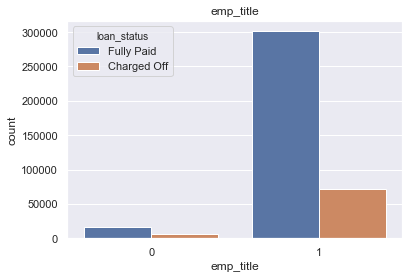

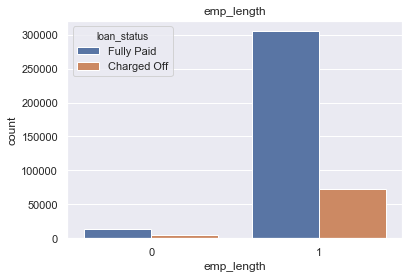

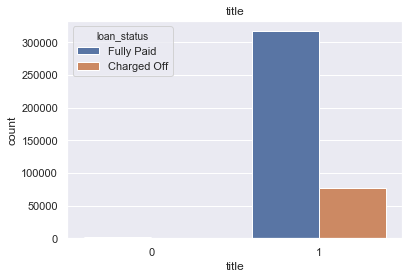

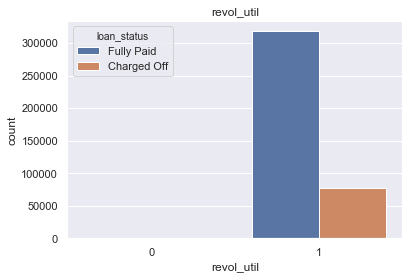

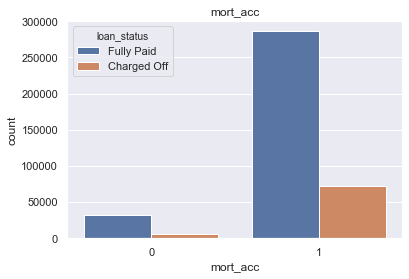

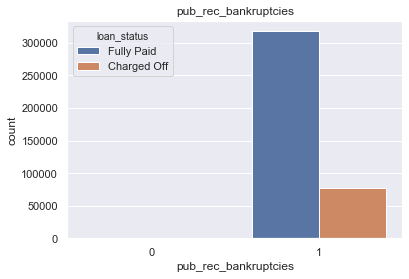

In [7]:
# Check to see relationship of missing value to target output "loan_status"
for feature in feature_nan:
    data =df.copy()
    data[feature] = np.where(data[feature].isnull(),0,1)
    sns.countplot(x=feature,data=data,hue='loan_status')
    plt.title(feature)
    plt.show()

# Numerical data

In [8]:
# Identifying all numerical data
num_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
print('There are {} numerical features'.format(len(num_feature)))

There are 12 numerical features


In [9]:
# Check the number of unique labels for each feature 
for feature in num_feature:
    print('{} feature has {} unique lables'.format(feature,df[feature].nunique()))

loan_amnt feature has 1397 unique lables
int_rate feature has 566 unique lables
installment feature has 55706 unique lables
annual_inc feature has 27197 unique lables
dti feature has 4262 unique lables
open_acc feature has 61 unique lables
pub_rec feature has 20 unique lables
revol_bal feature has 55622 unique lables
revol_util feature has 1226 unique lables
total_acc feature has 118 unique lables
mort_acc feature has 33 unique lables
pub_rec_bankruptcies feature has 9 unique lables


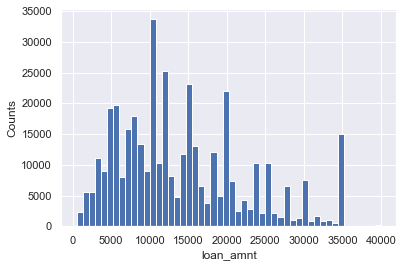

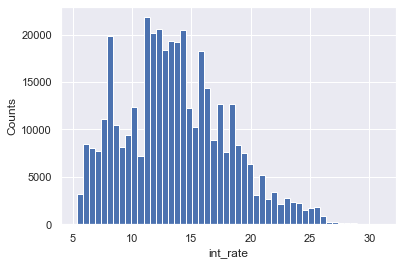

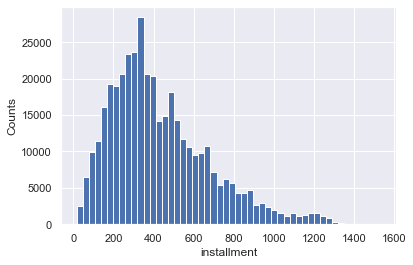

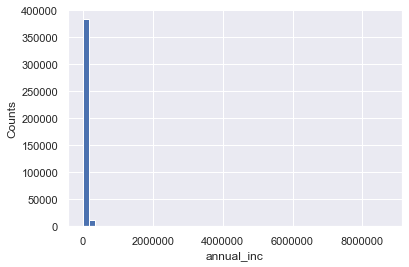

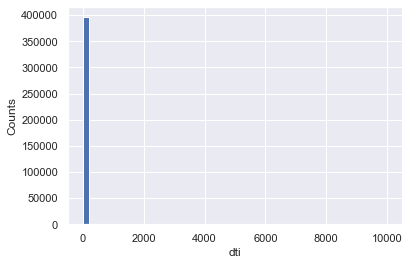

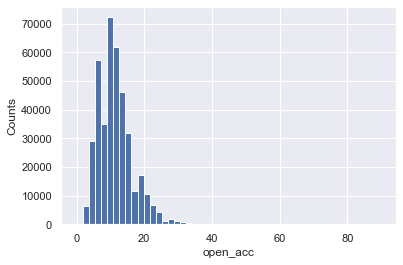

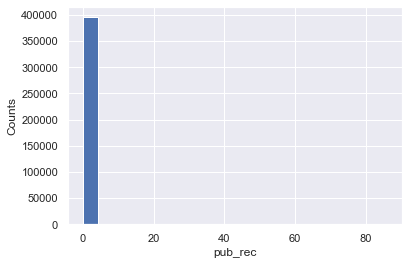

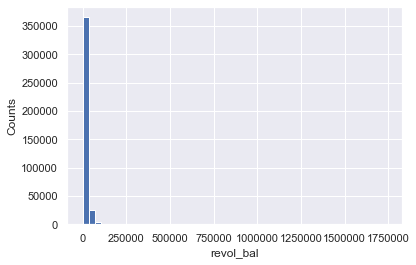

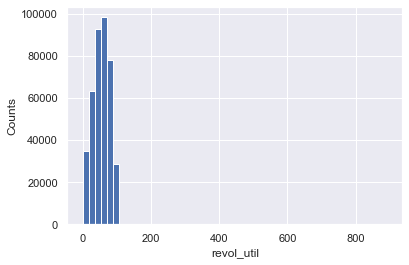

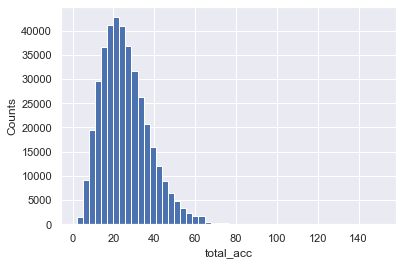

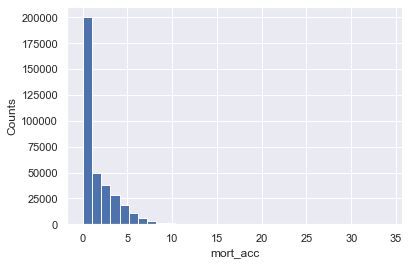

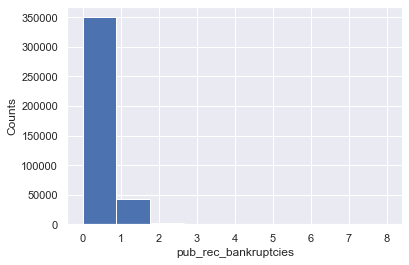

In [10]:
# Visualizing the distribution of numerical features
for feature in num_feature:
    data = df.copy()
    if data[feature].nunique()<=35:
        val = data[feature].nunique()
    else:
        val =50
    data[feature].plot.hist(bins=val)
    plt.xlabel(feature)
    plt.ylabel('Counts')
    plt.show()

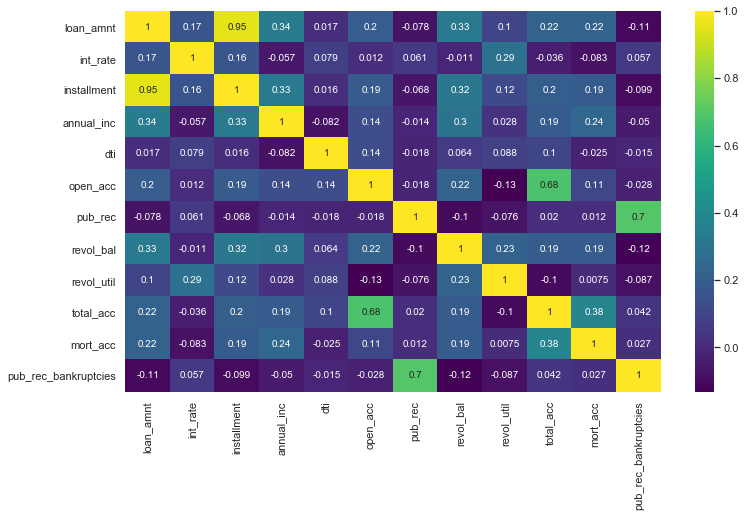

In [11]:
# Check correlation between features
plt.figure(figsize=(12,7))
sns.heatmap(data.corr(),annot=True,cmap='viridis')

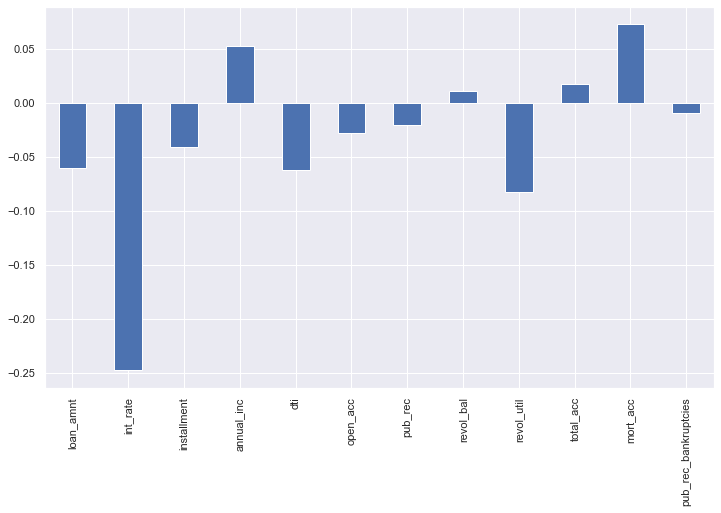

In [12]:
# Checking correlation of each feature to loan status
data=df.copy()
data['loan_status'] = np.where(data['loan_status'] == 'Fully Paid',1,0)

plt.figure(figsize=(12,7))
data.drop('loan_status',axis=1).corrwith(data['loan_status']).plot.bar()

In [13]:
feat_info('mort_acc')

Number of mortgage accounts.


# Categorical feature

In [14]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


In [15]:
# Identifying categorical data and excluding temporal data and the target feature
cat_feature = [feature for feature in df.columns if df[feature].dtypes =='O' and feature not in ['issue_d','earliest_cr_line','loan_status'] ]
print('There are {} categroical feature'.format(len(cat_feature)))

There are 12 categroical feature


In [16]:
# Check number of unique labels in each feature 
for feature in cat_feature:
    print('{} feature has {} unique labels'.format(feature,df[feature].nunique()))
    
# Note: [emp_title ,title,address]  features have to many unique variables to visualize as these features will most often be 
# unique to the user depending on their Company of work and living location

term feature has 2 unique labels
grade feature has 7 unique labels
sub_grade feature has 35 unique labels
emp_title feature has 173105 unique labels
emp_length feature has 11 unique labels
home_ownership feature has 6 unique labels
verification_status feature has 3 unique labels
purpose feature has 14 unique labels
title feature has 48817 unique labels
initial_list_status feature has 2 unique labels
application_type feature has 3 unique labels
address feature has 393700 unique labels


In [17]:
# Viualize all category feature with binary labels (2 labels only)
binary_feature =[feature for feature in cat_feature if df[feature].nunique()<=2]
print( 'There are {} features with binary labels'.format(len(binary_feature)))


There are 2 features with binary labels


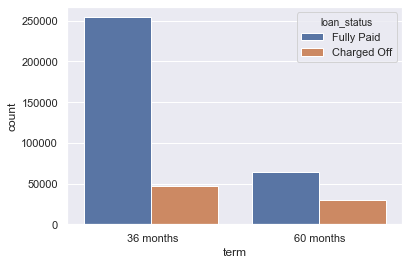

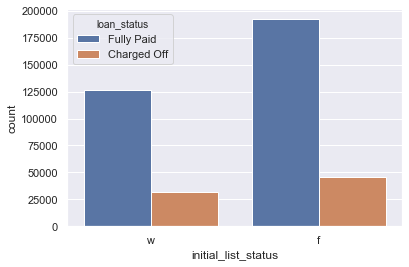

In [18]:
for feature in binary_feature:
    data=df.copy()
    sns.countplot(x=feature,data=data,hue='loan_status')
    plt.show()

<Figure size 1080x576 with 0 Axes>

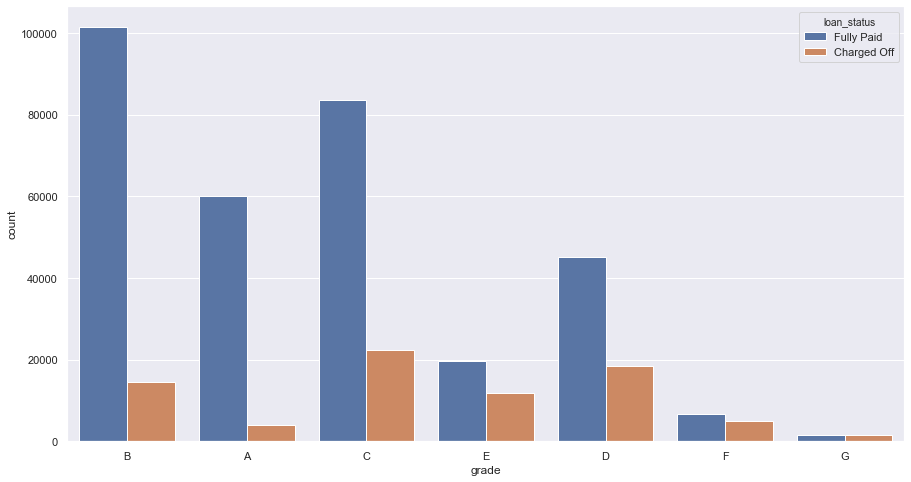

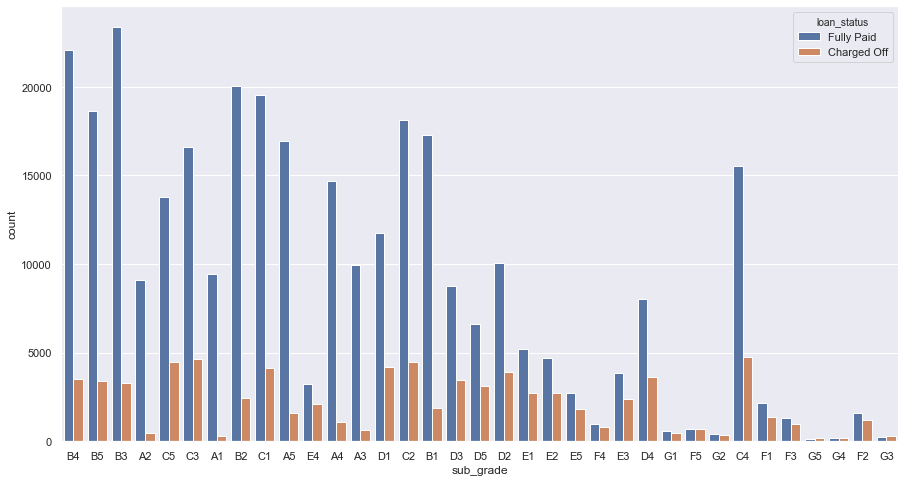

<Figure size 1080x576 with 0 Axes>

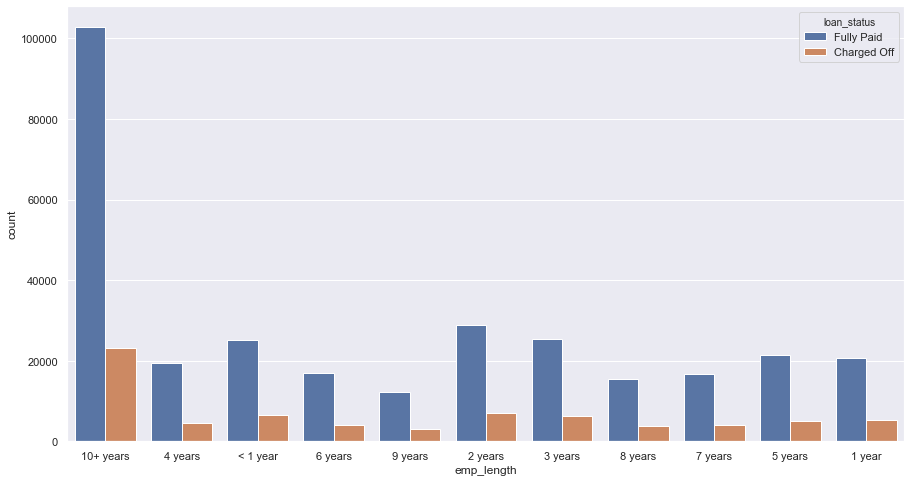

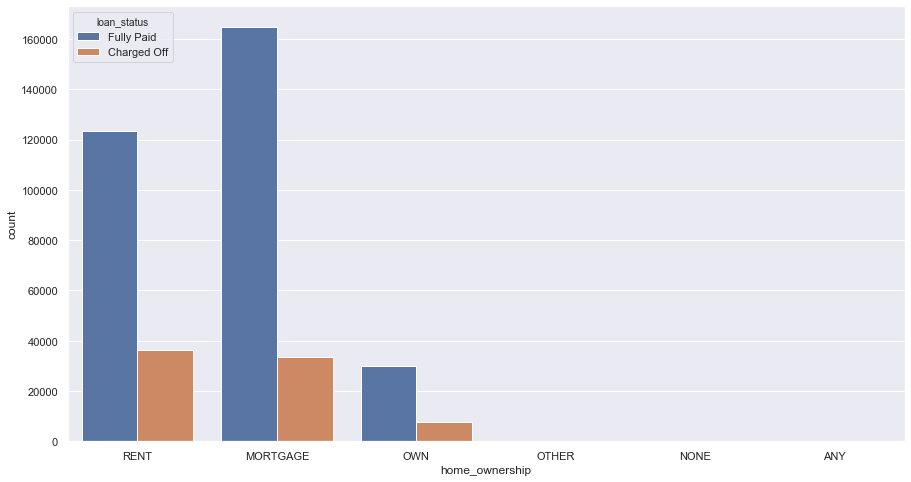

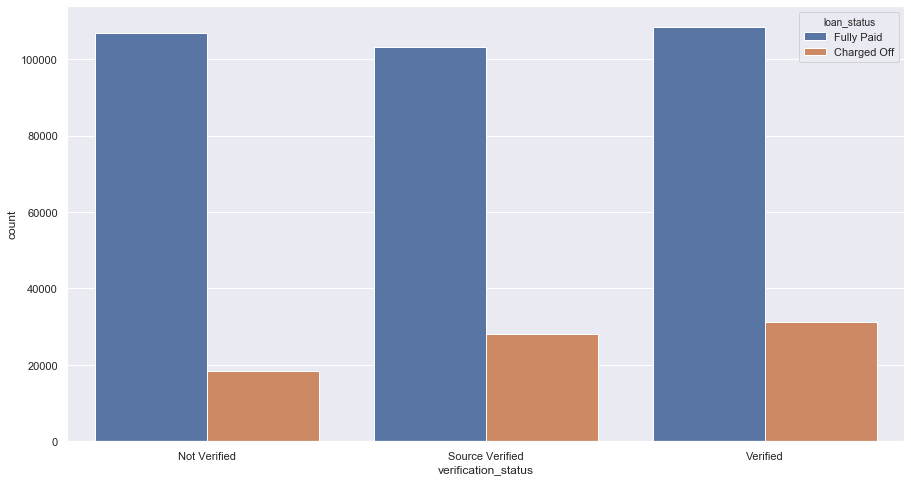

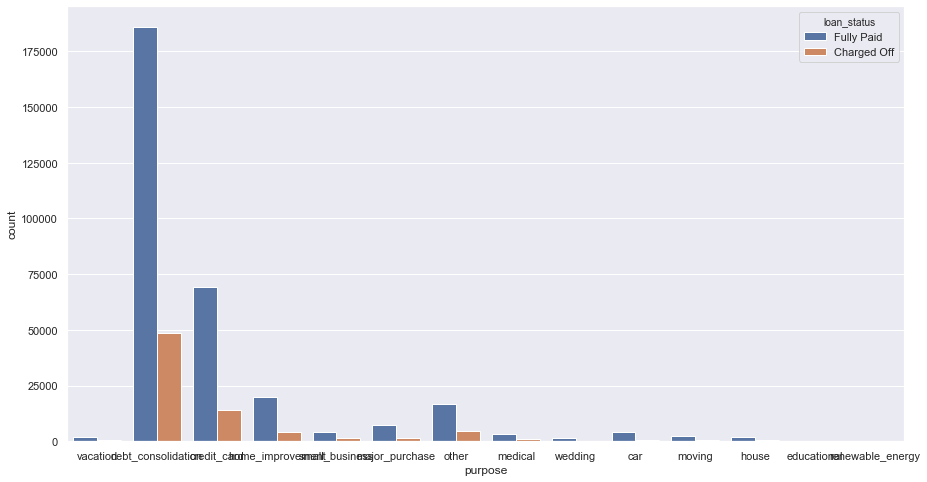

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>

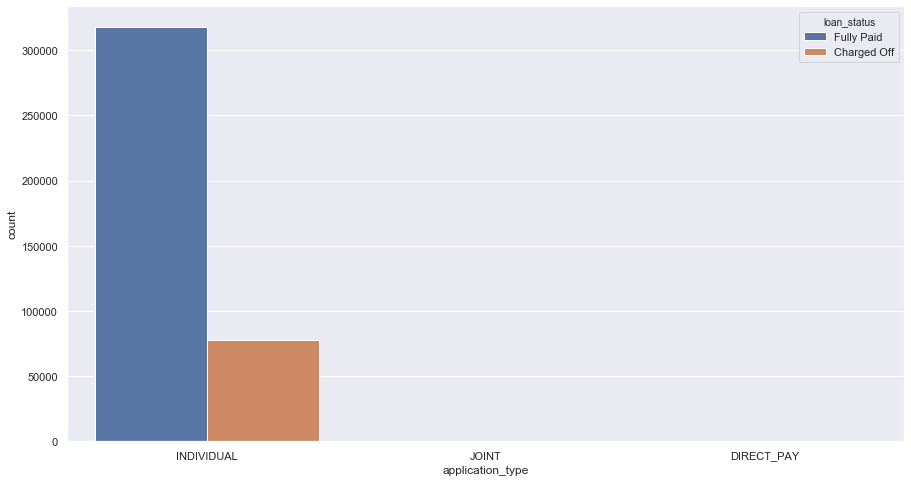

<Figure size 1080x576 with 0 Axes>

In [19]:
# Analyze remainder categorical features except [[emp_title ,title,address] ]
for feature in cat_feature:
    plt.figure(figsize = (15,8))
    data=df.copy()
    if feature not in ['emp_title' ,'title','address','term','initial_list_status']:
        sns.countplot(x=feature,data=data,hue='loan_status')
        plt.show()

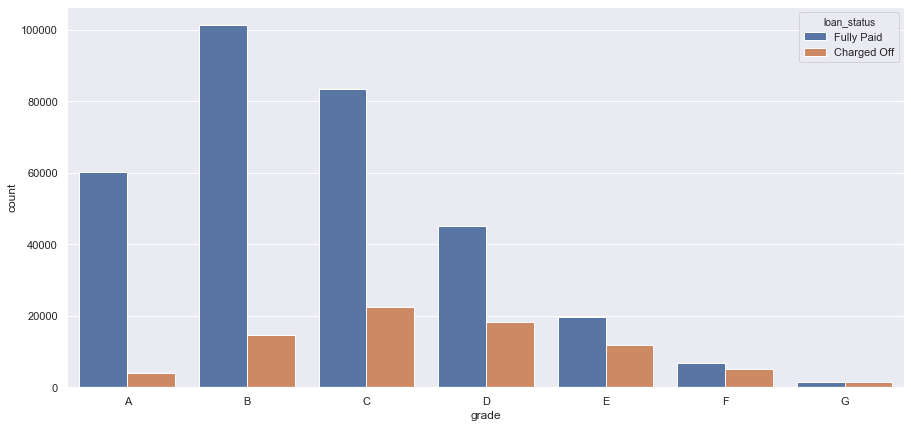

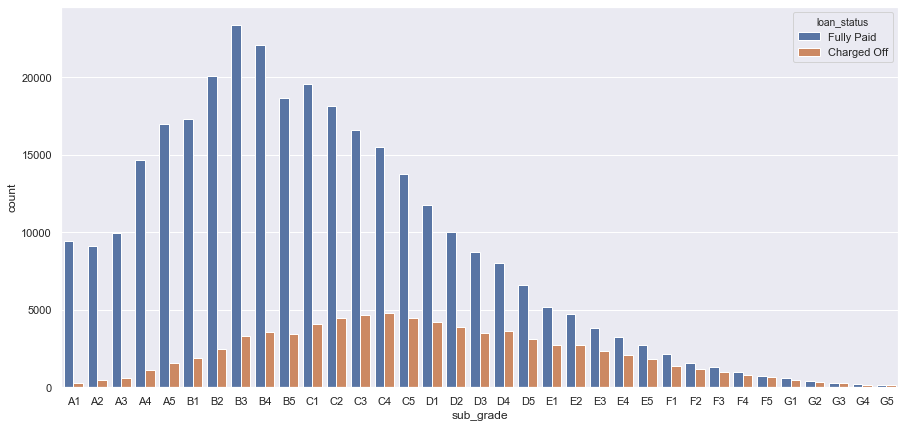

In [20]:
# Taking a closer look at Grade and Sub Grade feature 

for feature in ['grade','sub_grade']:
    plt.figure(figsize=(15,7))
    sorted_grade = sorted(df[feature].unique())
    sns.countplot(x=feature,data=df,hue='loan_status',order=sorted_grade)
    plt.show()

# The loan grades seems to indicate the risk level of a borrower with increasing ratio of charged of loans with each grade
# 'Sub_grades' simply reflect a more detail grading of each loan 'grade' but both data shows the same trend indicating they 
# are highly correlated


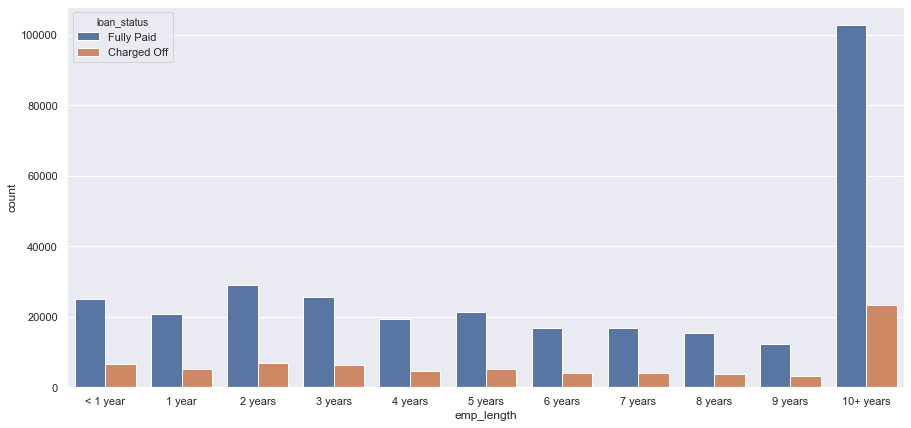

In [21]:
# looking at the emplotment length ('emp_length') data
plt.figure(figsize=(15,7))
sorted_duration =['< 1 year','1 year','2 years','3 years', '4 years', '5 years', '6 years','7 years','8 years','9 years','10+ years']
sns.countplot(x='emp_length',data=df,hue='loan_status',order=sorted_duration)

# Plot below shows the similar trends of Charged Off to Fully paid loans across all employment length
# WE can verify this buy ploting a bar plot of the ratio of charged off to fully paid customer for each employment length

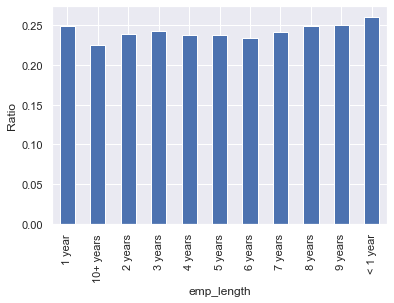

In [22]:
# Checking fully paid to charge off ratio

data=df.copy()
data['loan_status'] =np.where(data['loan_status']=='Fully Paid',1,0)
emp_fp = data[data['loan_status']== 1].groupby('emp_length').count()['loan_status']
emp_co = data[data['loan_status']== 0].groupby('emp_length').count()['loan_status']
(emp_co/emp_fp).plot.bar()
plt.xlabel('emp_length')
plt.ylabel('Ratio')
plt.show()

# From plot below we can see that emplyment length has no impact on the charged of to Fully Paid ratio

# Temporal data

In [23]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


# Feature Engineering

In [24]:
data_pre_process =df.copy()

# Missing Values Of Numerical Features

In [25]:
# Checking numerical feature with missign values
num_nan = [feature for feature in num_feature if data_pre_process[feature].isnull().sum() >1]
print('There are {} numerical features with missing values'.format(len(num_nan)))

for feature in num_nan:
    print(feature)


There are 3 numerical features with missing values
revol_util
mort_acc
pub_rec_bankruptcies


# Revol_util feature

In [26]:
# Studying the revol_util feature
feat_info('revol_util')

Revolving line utilization rate, or the amount of credit the borrower is using relative to all available revolving credit.


In [27]:
# Percentage of data missing
df['revol_util'].isnull().mean() # Missing values <0.01 are very small so we can drop the rows



0.0006969169002348307

In [28]:
# Drop the rows with missing values from the revol_util columns
data_pre_process = data_pre_process.dropna(how='any',subset=['revol_util'],axis=0)


# Mort_acc feature

In [29]:
# Feature definition
feat_info('mort_acc')

Number of mortgage accounts.


In [30]:
# Percentage of missing data
df['mort_acc'].isnull().mean()

0.09543468929121532

In [31]:
# Determine correlated feature which we can maybe use to fill missing values
data_pre_process.corrwith(data_pre_process['mort_acc'])

loan_amnt               0.222381
int_rate               -0.082656
installment             0.193752
annual_inc              0.236277
dti                    -0.025401
open_acc                0.109440
pub_rec                 0.011576
revol_bal               0.195063
revol_util              0.007514
total_acc               0.381205
mort_acc                1.000000
pub_rec_bankruptcies    0.027273
dtype: float64

In [32]:
# We can use the mean number of mortgage accounts based on the total number of accounts
mean_mort_acc = np.round(data_pre_process.groupby('total_acc').mean()['mort_acc'],0)

In [33]:
mean_mort_acc[124]

1.0

In [34]:
# Create a fucntion that will fill the missing values in the mort_acc column using this idea
def mort_acc_fill(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return mean_mort_acc[total_acc]
    else:
        return mort_acc

In [35]:
data_pre_process['mort_acc'] = data_pre_process.apply(lambda x :mort_acc_fill( x['total_acc'],x['mort_acc']),axis =1)

# Pub_rec_bankruptcies feature

In [36]:
# Feature definition
feat_info('pub_rec_bankruptcies')

Number of public record bankruptcies


In [37]:
# Percentage of missing value
df['pub_rec_bankruptcies'].isnull().mean() # Missing Value is also small we can drop it

0.0013509077595131682

In [38]:
data_pre_process = data_pre_process.dropna(how='any',subset=['pub_rec_bankruptcies'],axis=0)

In [39]:
data_pre_process

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,Vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,Debt consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,Credit card refinancing,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,Credit card refinancing,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,Credit Card Refinance,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,Debt consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,Debt consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,pay off credit cards,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466"
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,Loanforpayoff,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2..."


# Missing Values Of Categorical Features

In [40]:
# Determining all categorical feature with missing values
cat_nan =[feature for feature in cat_feature if data_pre_process[feature].isnull().sum()>1]
print('There are {} categorical feature with missing value'.format(len(cat_nan)))

for feature in cat_nan:
    print(feature)

There are 3 categorical feature with missing value
emp_title
emp_length
title


In [41]:
# Percentage of data missing for all the features
for feature in cat_nan:
    print('{} feature has {} missing data point with missing ratio of{}'.format(feature,data_pre_process[feature].isnull().sum()
                                                                               ,data_pre_process[feature].isnull().mean()))

    # Examine number of unique labels in each cat feature
for feature in cat_nan:
    print('{} feature has {} unique labels in it'.format(feature,data_pre_process[feature].nunique()))
    
# With significant amount of missing data and to many unique variables to determine any correlation to fill the missing values
#to... we can drop these three features


emp_title feature has 22881 missing data point with missing ratio of0.057894483817832645
emp_length feature has 18290 missing data point with missing ratio of0.04627813946191858
title feature has 1754 missing data point with missing ratio of0.004438045741728004
emp_title feature has 172650 unique labels in it
emp_length feature has 11 unique labels in it
title feature has 48472 unique labels in it


In [42]:
data_pre_process.drop(['emp_title', 'emp_length', 'title'],axis=1,inplace=True)

In [43]:
data_pre_process.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

# One-Hot Encoding for categorical features

In [44]:
# Determine all categorical features
new_cat_feature = [feature for feature in data_pre_process.columns if data_pre_process[feature].dtypes =='O']
print('There are {} categorical features that need to looked at'.format(len(new_cat_feature)))

for feature in new_cat_feature:
    print(feature)

There are 12 categorical features that need to looked at
term
grade
sub_grade
home_ownership
verification_status
issue_d
loan_status
purpose
earliest_cr_line
initial_list_status
application_type
address


In [45]:
# Check all the unique labels in each feature 
for feature in new_cat_feature:
    print('{} feature has {} unique labels'.format(feature,data_pre_process[feature].nunique()))

term feature has 2 unique labels
grade feature has 7 unique labels
sub_grade feature has 35 unique labels
home_ownership feature has 6 unique labels
verification_status feature has 3 unique labels
issue_d feature has 112 unique labels
loan_status feature has 2 unique labels
purpose feature has 14 unique labels
earliest_cr_line feature has 684 unique labels
initial_list_status feature has 2 unique labels
application_type feature has 3 unique labels
address feature has 392898 unique labels


# Term feature


In [46]:
# Feature definition 
feat_info('term')

The number of payments on the loan. Values are in months and can be either 36 or 60.


In [47]:
# Number of unique feature 
data_pre_process['term'].unique()

# Since it has two terms we can ammend the columns to reflect either 36 or 60
data_pre_process['term'] = data_pre_process.term.str.slice(0,3).astype(int)

# Grade Feature

In [48]:
# As discussed earlier the sub_grade feature reflects the grade feature making it highly correlated.
# Drop the grade feature
data_pre_process.drop('grade',axis=1,inplace=True)

# Sub-Grade feature

In [49]:
# We will call dummies for this
sub_grade_dummies = pd.get_dummies(data_pre_process['sub_grade'],drop_first=True)
data_pre_process = pd.concat([data_pre_process.drop('sub_grade',axis=1),sub_grade_dummies],axis=1)

In [50]:
data_pre_process

,loan_amnt,term,int_rate,installment,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address,A2,A3,A4,A5,B1,B2,B3,B4,B5,C1,C2,C3,C4,C5,D1,D2,D3,D4,D5,E1,E2,E3,E4,E5,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
0,10000.0,36,11.44,329.48,RENT,117000.0,Not Verified,Jan-2015,Fully Paid,vacation,26.24,Jun-1990,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,MORTGAGE,65000.0,Not Verified,Jan-2015,Fully Paid,debt_consolidation,22.05,Jul-2004,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113",0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,RENT,43057.0,Source Verified,Jan-2015,Fully Paid,credit_card,12.79,Aug-2007,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113",0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7200.0,36,6.49,220.65,RENT,54000.0,Not Verified,Nov-2014,Fully Paid,credit_card,2.60,Sep-2006,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813",1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,MORTGAGE,55000.0,Verified,Apr-2013,Charged Off,credit_card,33.95,Mar-1999,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650",0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,RENT,40000.0,Source Verified,Oct-2015,Fully Paid,debt_consolidation,15.63,Nov-2004,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\nJohnnyville, DC 30723",0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396026,21000.0,36,12.29,700.42,MORTGAGE,110000.0,Source Verified,Feb-2015,Fully Paid,debt_consolidation,21.45,Feb-2006,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\nRachelborough, LA...",0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396027,5000.0,36,9.99,161.32,RENT,56500.0,Verified,Oct-2013,Fully Paid,debt_consolidation,17.56,Mar-1997,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\nReedfort, NY 70466",0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
396028,21000.0,60,15.31,503.02,MORTGAGE,64000.0,Verified,Aug-2012,Fully Paid,debt_consolidation,15.88,Nov-1990,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\nNew Michael, FL 2...",0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Home Ownership feature

In [51]:
# Feature info
feat_info('home_ownership')

The home ownership status provided by the borrower during registration or obtained from the credit report. Our values are: RENT, OWN, MORTGAGE, OTHER


In [52]:
# Taking value counts on this
data_pre_process['home_ownership'].value_counts()

# looks like majority of the data is in 3 groups. We can group the minority label along with the label 'Other'

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [53]:
data_pre_process['home_ownership'] = data_pre_process['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [54]:
data_pre_process['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [55]:
# Call dummies on these 4 labels
home_ownership_dummies = pd.get_dummies(data_pre_process['home_ownership'],drop_first=True)
data_pre_process = pd.concat([data_pre_process.drop('home_ownership',axis=1),home_ownership_dummies],axis=1)

# The following feature are suitable to one-hot encode directly
['verification_status','application_type','initial_list_status', 'purpose']

In [56]:
group_dummies = pd.get_dummies(data_pre_process[['verification_status','application_type','initial_list_status', 'purpose']],
                               drop_first=True)
data_pre_process = pd.concat([data_pre_process.drop(['verification_status','application_type','initial_list_status', 'purpose']
                                                   ,axis=1),group_dummies],axis=1)


# Issue_d feature

In [57]:
feat_info('issue_d')

The month which the loan was funded


In [58]:
# Note that the model than is being built is to predict customer's that will Charge of a Loan prior to issuing the loan
# As a result this feature will not contribute any computing power
# Drop the feature
data_pre_process.drop('issue_d',axis=1,inplace=True)

# Loan_ status ( target feature)

In [59]:
# Since this is the target feature we just need to create the binary columns for it
data_pre_process['loan_status'] = np.where(data_pre_process['loan_status']=='Fully Paid',1,0)

# Earliest Credit Line feature

In [60]:
# Feature info
feat_info('earliest_cr_line')

The month the borrower's earliest reported credit line was opened


In [61]:
data_pre_process['earliest_cr_line'] # Temporal type of data. We can slice the year out and use that

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [62]:
# Ammendign the earliest credit line column
data_pre_process['earliest_cr_line'] = data_pre_process['earliest_cr_line'].apply(lambda date: int(date[-4:]))

# Address Feature

In [63]:
data_pre_process['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [64]:
 # Looking at the feature above we can group the data based on their zipcode
data_pre_process['zipcode'] = data_pre_process['address'].apply(lambda x : int(x[-5:]))

In [65]:
# Drop original address column
data_pre_process.drop('address',axis=1,inplace=True)

In [66]:
data_pre_process.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 395219 entries, 0 to 396029
Data columns (total 71 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            395219 non-null  float64
 1   term                                 395219 non-null  int32  
 2   int_rate                             395219 non-null  float64
 3   installment                          395219 non-null  float64
 4   annual_inc                           395219 non-null  float64
 5   loan_status                          395219 non-null  int32  
 6   dti                                  395219 non-null  float64
 7   earliest_cr_line                     395219 non-null  int64  
 8   open_acc                             395219 non-null  float64
 9   pub_rec                              395219 non-null  float64
 10  revol_bal                            395219 non-null  float64
 11  revol_util   

# Feature Engineering Completed

# We will examine 3 different models and compare its performance

# Split data into Train and test data

In [67]:
data_final = data_pre_process.copy()
X = data_final.drop('loan_status',axis=1)
y = data_final['loan_status']


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [69]:
X_train.shape

(316175, 70)

In [70]:
y_train.shape

(316175,)

# Scaling Data

In [71]:
from sklearn.preprocessing import MinMaxScaler

In [72]:
scaler = MinMaxScaler()
X_train_scale = pd.DataFrame(scaler.fit_transform(X_train),columns=[X_train.columns])
X_test_scale = pd.DataFrame(scaler.transform(X_test),columns=[X_test.columns])
X_train=X_train_scale
X_test = X_test_scale

In [73]:
X_train.shape

(316175, 70)

In [74]:
y_train.shape

(316175,)

# Logistic Regression

In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score


In [76]:
model =LogisticRegression(random_state=0,penalty='l2')
model.fit(X_train,y_train)
predictions =model.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))




C:\Users\Shangar\Anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


              precision    recall  f1-score   support

           0       0.69      0.30      0.42     15572
           1       0.85      0.97      0.90     63472

    accuracy                           0.84     79044
   macro avg       0.77      0.63      0.66     79044
weighted avg       0.82      0.84      0.81     79044

[[ 4633 10939]
 [ 2036 61436]]


# Random Forest

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,f1_score,precision_score,recall_score

model =RandomForestClassifier(random_state=0,n_estimators=100,criterion='entropy')
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))


              precision    recall  f1-score   support

           0       0.95      0.44      0.61     15572
           1       0.88      0.99      0.93     63472

    accuracy                           0.89     79044
   macro avg       0.91      0.72      0.77     79044
weighted avg       0.89      0.89      0.87     79044

[[ 6923  8649]
 [  383 63089]]


# Using Neural Networks 

In [81]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [82]:
model = Sequential()

model.add(Dense(70,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(39,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(19,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

model.compile(loss ='binary_crossentropy',optimizer='adam')

In [83]:
X=data_final.drop('loan_status',axis=1).values
y=data_final['loan_status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model.fit(X_train,y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test))

Train on 276653 samples, validate on 118566 samples
Epoch 1/25
276653/276653 [==============================] - 11s 38us/sample - loss: 0.4178 - val_loss: 0.3677
Epoch 2/25
276653/276653 [==============================] - 9s 31us/sample - loss: 0.3739 - val_loss: 0.3617
Epoch 3/25
276653/276653 [==============================] - 9s 31us/sample - loss: 0.3672 - val_loss: 0.3575
Epoch 4/25
276653/276653 [==============================] - 9s 31us/sample - loss: 0.3524 - val_loss: 0.3300
Epoch 5/25
276653/276653 [==============================] - 9s 31us/sample - loss: 0.3329 - val_loss: 0.2991
Epoch 6/25
276653/276653 [==============================] - 9s 31us/sample - loss: 0.2991 - val_loss: 0.2824
Epoch 7/25
276653/276653 [==============================] - 8s 30us/sample - loss: 0.2884 - val_loss: 0.2801
Epoch 8/25
276653/276653 [==============================] - 8s 29us/sample - loss: 0.2854 - val_loss: 0.2781
Epoch 9/25
276653/276653 [==============================] - 8s 29us/sample 

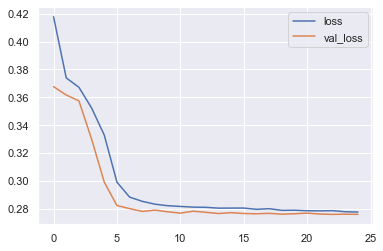

In [84]:
pd.DataFrame(model.history.history).plot()

In [85]:
predictions =model.predict_classes(X_test)

In [86]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[ 9976 13234]
 [   20 95336]]
              precision    recall  f1-score   support

           0       1.00      0.43      0.60     23210
           1       0.88      1.00      0.94     95356

    accuracy                           0.89    118566
   macro avg       0.94      0.71      0.77    118566
weighted avg       0.90      0.89      0.87    118566



# Conclusion:

## 1) From the 3 models that were tested we received best overall performance from the neural network method
## 2) It is important to note that for this case, a probable key metric to monitor is the number of false negatives predicted as the impact due to this weakness in the model could cause loss of revenue to the company 
## 3) Also, although the neural network method shows a strong performance, it is important to note that we did not perform any hyper-parameter tuning for the random forest method which could improve the results achieved 
## 4) As a final note depending on what is the companies main goal of having this model either to reduce losses (predict nature of customer with high default probability) or increase profit ( identifying the key customer features that will ensure very low probability of loan defaults so that they can target these customer profiles), the models used can be fine tuned to achieve the desired performance metric. 